<a href="https://colab.research.google.com/github/ParisaGhorbani/ParisaGhorbani/blob/main/t_sne_thickness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data preparation**

In [ ]:
#https://drive.google.com/file/d/11MEDhSABeAHNpRnL4gAWVLA_2KHu7cLo/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 11MEDhSABeAHNpRnL4gAWVLA_2KHu7cLo

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (uriginal): https://drive.google.com/uc?id=11MEDhSABeAHNpRnL4gAWVLA_2KHu7cLo
From (redirected): https://drive.google.com/uc?id=11MEDhSABeAHNpRnL4gAWVLA_2KHu7cLo&confirm=t&uuid=ba6917a8-952b-4a86-b8b2-c4c2ffcbd840
To: /content/thickness_1_5_train.zip
100% 28.0M/28.0M [00:01<00:00, 16.1MB/s]


if .rar

In [ ]:
# !pip install rarfile

# import rarfile

# rar_file_path = '/content/dataset_test.rar'
# folder_path = '/content/Dataset'

# # Extract the rar file to the specified folder
# with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
#     rar_ref.extractall(folder_path)

if .zip

In [ ]:
import zipfile
zip_file_path = '/content/thickness_1_5_train.zip'
folder_path = '/content/thickness_1_5_train'
# Extract the zip file to the specified folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

In [ ]:
import os
file_path = "/content/thickness_1_5_train.zip"
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted successfully.")
else:
    print(f"{file_path} does not exist.")

/content/thickness_1_5_train.zip has been deleted successfully.


In [ ]:
# import os

# # os.rename("/content/datasetC_2clacc_1_5_4/datasetC_2clacc/datasetC_2clacc_1_5_4/train/5","/content/datasetC_2clacc_1_5_4/datasetC_2clacc/datasetC_2clacc_1_5_4/train/2")

# import os

# os.rename("/content/datasetC_2clacc_1_5_4/datasetC_2clacc/datasetC_2clacc_1_5_4/test/5","/content/datasetC_2clacc_1_5_4/datasetC_2clacc/datasetC_2clacc_1_5_4/test/2")


# import os

# os.rename("/content/datasetC_2clacc_1_5_4/datasetC_2clacc/datasetC_2clacc_1_5_4/valid/5","/content/datasetC_2clacc_1_5_4/datasetC_2clacc/datasetC_2clacc_1_5_4/valid/2")

Reorder datset folder!

In [ ]:
# import os
# import shutil

# # define the paths to the original and new dataset directories
# orig_dir = '/content/Dataset/dataset1'
# new_dir = '/content/Dataset/dataset11'

# # create the new dataset directory if it doesn't already exist
# if not os.path.exists(new_dir):
#     os.makedirs(new_dir)

# # loop over the subdirectories in the original dataset directory
# for subdir in os.listdir(orig_dir):
#     # create the subdirectories in the new dataset directory
#     train_dir = os.path.join(new_dir, 'train', subdir)
#     valid_dir = os.path.join(new_dir, 'valid', subdir)
#     test_dir = os.path.join(new_dir, 'test', subdir)
#     for dir in [train_dir, valid_dir, test_dir]:
#         if not os.path.exists(dir):
#             os.makedirs(dir)
#     # move the files from the original subdirectories to the new subdirectories
#     for phase in ['train', 'valid', 'test']:
#         orig_phase_dir = os.path.join(orig_dir, subdir, phase)
#         new_phase_dir = os.path.join(new_dir, phase, subdir)
#         for file in os.listdir(orig_phase_dir):
#             orig_path = os.path.join(orig_phase_dir, file)
#             new_path = os.path.join(new_phase_dir, file)
#             shutil.move(orig_path, new_path)
#     # remove the original subdirectories
#     shutil.rmtree(os.path.join(orig_dir, subdir))


In [ ]:
import os

# data_dir = "/content/thichness_2class/thichness_2class2"
# subfolders = ["train", "valid","test"]

# for subfolder in subfolders:
#     print(f"Subfolder: {subfolder}")
#     for folder_name in os.listdir(os.path.join(data_dir, subfolder)):
#         folder_path = os.path.join(data_dir, subfolder, folder_name)
#         num_jpg = sum(1 for file_name in os.listdir(folder_path) if file_name.lower().endswith(".jpg"))
#         print(f"    Folder: {folder_name} | Num JPG files: {num_jpg}")


In [ ]:
# import cv2
# import os

# img_path = "/content/P_new/P_new_new/test/1/Baba Mohammadiyan_Samira_OD_23052020_114124_4 Maps Refr.JPG"

# # check if image file exists
# if os.path.isfile(img_path):
#     img = cv2.imread(img_path)
#     print(f"Image shape: {img.shape}")
#     print(f"Image size: {os.path.getsize(img_path)} bytes")
# else:
#     print("Error: Image file not found.")


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

import copy
from collections import namedtuple
import os
import random
import shutil
import time
import zipfile

In [ ]:
SEED = 500

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# library

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

import copy
from collections import namedtuple
import os
import random
import shutil
import time
import zipfile

In [ ]:
SEED = 500

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# **train & test data**

In [ ]:
train_dir = "/content/thickness_1_5_train/thickness_1_5_train"
#valid_dir = "/content/elevationback_2class/elevationback_2class/valid"
# test_dir  = "/content/elevationfront_2class/elevationfront_2class/test"



In [ ]:
#calculate mean & STD
train_data = datasets.ImageFolder(root = train_dir, transform = transforms.ToTensor())

means = torch.zeros(3)
stds = torch.zeros(3)

for img, label in train_data:
    means += torch.mean(img, dim = (1,2))
    stds += torch.std(img, dim = (1,2))

means /= len(train_data)
stds /= len(train_data)

print(f'Calculated means: {means}')
print(f'Calculated stds: {stds}')

Calculated means: tensor([0.3424, 0.6278, 0.2738])
Calculated stds: tensor([0.3285, 0.3669, 0.3286])


In [ ]:
pretrained_means = [0.3424, 0.6278, 0.2738]
pretrained_stds= [0.3285, 0.3669, 0.3286]

## t-SNE

### resnet18

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 254MB/s]


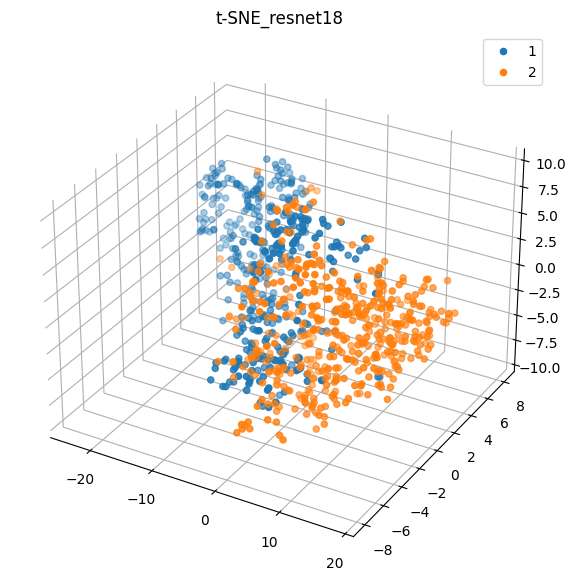

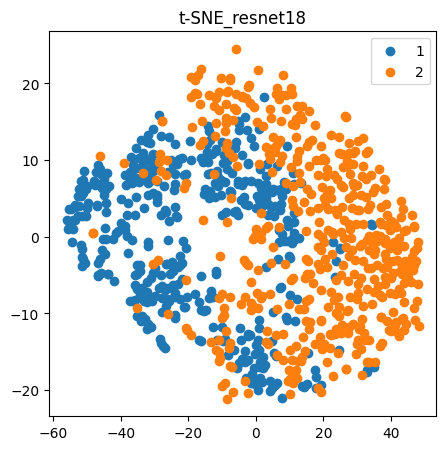

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# pretrained_means = [0.3744, 0.4508, 0.3808]
# pretrained_stds= [0.4204, 0.3466, 0.4231]


# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Load pre-trained model for feature extraction
model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
tsne = TSNE(n_components=3)
embeddings = tsne.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('t-SNE_resnet18')
plt.legend()

# Save the plot as a PNG file
plt.savefig('t-SNE_resnet18_3.pdf')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
ts = TSNE(n_components=2)
embedd = ts.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('t-SNE_resnet18')
# Save the plot as a PNG file
plt.savefig('t-SNE_resnet18_2.pdf')
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise distances in the t-SNE embedding space
tsne_distances = pairwise_distances(embeddings)

# Calculate cosine similarity matrix for the t-SNE embeddings
cosine_sim = cosine_similarity(embeddings)

# Calculate silhouette score in the t-SNE embedding space
silhouette_tsne = silhouette_score(tsne_distances, labels, metric='precomputed')

# Calculate Davies-Bouldin index in the t-SNE embedding space
davies_bouldin_tsne = davies_bouldin_score(embeddings, labels)

# Apply K-Means clustering to t-SNE embeddings
kmeans = KMeans(n_clusters=len(dataset.classes), random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Calculate Adjusted Rand Index (ARI) for clustering
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels, cluster_labels)

# Calculate Inertia for K-Means clustering
inertia = kmeans.inertia_

# Calculate pairwise cosine similarities in the original feature space
cosine_sim_orig = cosine_similarity(features)

# Calculate the Frobenius norm of the difference between the original and t-SNE similarity matrices
frobenius_norm = np.linalg.norm(cosine_sim_orig - cosine_sim)

print("Silhouette Score (t-SNE):", silhouette_tsne)
print("Davies-Bouldin Index (t-SNE):", davies_bouldin_tsne)
print("Adjusted Rand Index (ARI) for Clustering:", ari)
print("Inertia for Clustering:", inertia)
print("Frobenius Norm of Similarity Matrices:", frobenius_norm)

Silhouette Score (t-SNE): 0.2443627
Davies-Bouldin Index (t-SNE): 1.3355687735557877
Adjusted Rand Index (ARI) for Clustering: 0.25995509668429573
Inertia for Clustering: 51956.19140625
Frobenius Norm of Similarity Matrices: 983.8364


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### resnet50

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 288MB/s]


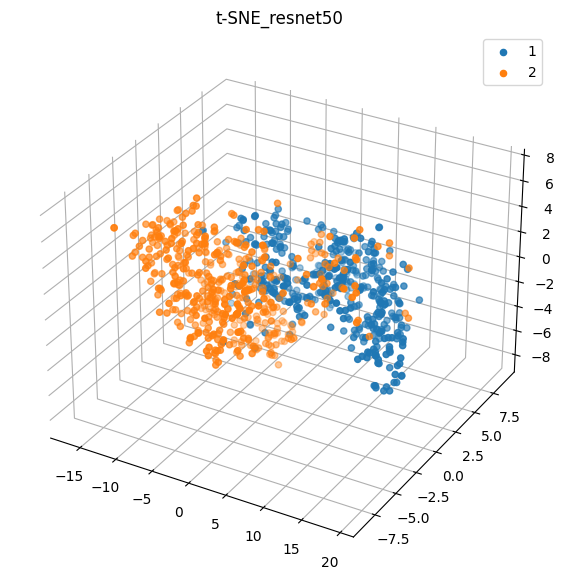

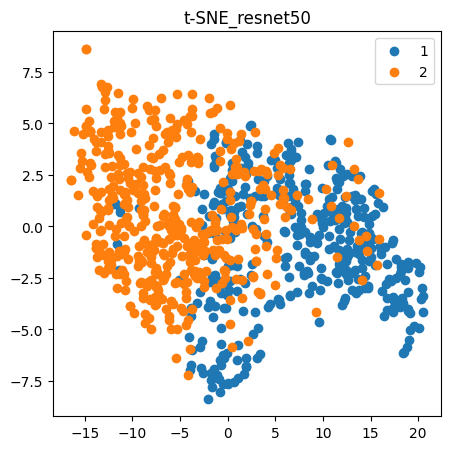

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# pretrained_means = [0.6190, 0.7493, 0.6781]
# pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Load pre-trained model for feature extraction
model = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
tsne = TSNE(n_components=3)
embeddings = tsne.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('t-SNE_resnet50')
plt.legend()

# Save the plot as a PNG file
plt.savefig('t-SNE_resnet50_3.pdf')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
ts = TSNE(n_components=2)
embedd = tsne.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('t-SNE_resnet50')
# Save the plot as a PNG file
plt.savefig('t-SNE_resnet50_2.pdf')
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise distances in the t-SNE embedding space
tsne_distances = pairwise_distances(embeddings)

# Calculate cosine similarity matrix for the t-SNE embeddings
cosine_sim = cosine_similarity(embeddings)

# Calculate silhouette score in the t-SNE embedding space
silhouette_tsne = silhouette_score(tsne_distances, labels, metric='precomputed')

# Calculate Davies-Bouldin index in the t-SNE embedding space
davies_bouldin_tsne = davies_bouldin_score(embeddings, labels)

# Apply K-Means clustering to t-SNE embeddings
kmeans = KMeans(n_clusters=len(dataset.classes), random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Calculate Adjusted Rand Index (ARI) for clustering
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels, cluster_labels)

# Calculate Inertia for K-Means clustering
inertia = kmeans.inertia_

# Calculate pairwise cosine similarities in the original feature space
cosine_sim_orig = cosine_similarity(features)

# Calculate the Frobenius norm of the difference between the original and t-SNE similarity matrices
frobenius_norm = np.linalg.norm(cosine_sim_orig - cosine_sim)

print("Silhouette Score (t-SNE):", silhouette_tsne)
print("Davies-Bouldin Index (t-SNE):", davies_bouldin_tsne)
print("Adjusted Rand Index (ARI) for Clustering:", ari)
print("Inertia for Clustering:", inertia)
print("Frobenius Norm of Similarity Matrices:", frobenius_norm)

Silhouette Score (t-SNE): 0.26984918
Davies-Bouldin Index (t-SNE): 1.2680825963096714
Adjusted Rand Index (ARI) for Clustering: 0.2933645692089855
Inertia for Clustering: 40220.0625
Frobenius Norm of Similarity Matrices: 998.227


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###  vgg19

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:02<00:00, 255MB/s]


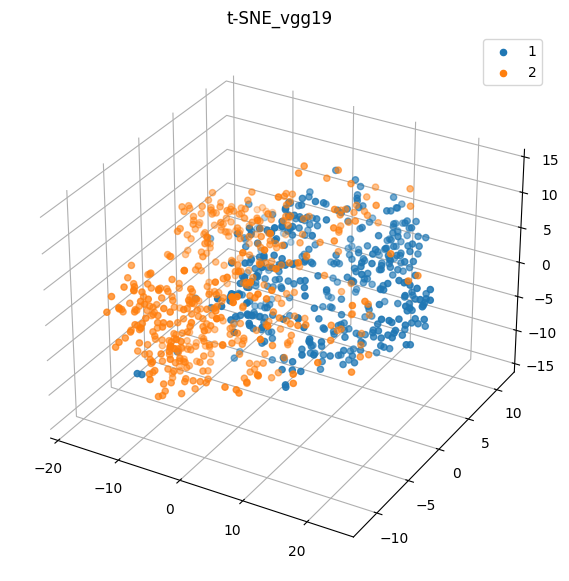

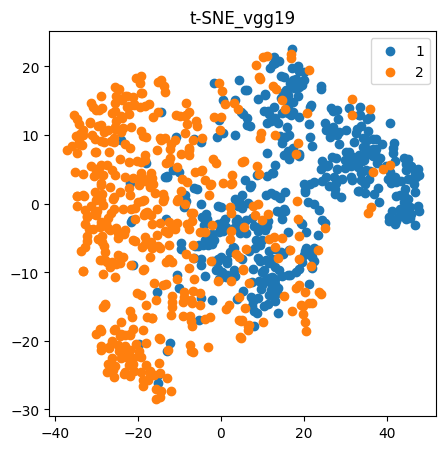

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# pretrained_means = [0.6190, 0.7493, 0.6781]
# pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Load pre-trained model for feature extraction
model = torch.hub.load('pytorch/vision', 'vgg19', pretrained=True)
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
tsne = TSNE(n_components=3)
embeddings = tsne.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('t-SNE_vgg19')
plt.legend()

# Save the plot as a PNG file
plt.savefig('t-SNE_vgg19_3.pdf')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
ts = TSNE(n_components=2)
embedd = ts.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('t-SNE_vgg19')
# Save the plot as a PNG file
plt.savefig('t-SNE_vgg19_2.pdf')
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise distances in the t-SNE embedding space
tsne_distances = pairwise_distances(embeddings)

# Calculate cosine similarity matrix for the t-SNE embeddings
cosine_sim = cosine_similarity(embeddings)

# Calculate silhouette score in the t-SNE embedding space
silhouette_tsne = silhouette_score(tsne_distances, labels, metric='precomputed')

# Calculate Davies-Bouldin index in the t-SNE embedding space
davies_bouldin_tsne = davies_bouldin_score(embeddings, labels)

# Apply K-Means clustering to t-SNE embeddings
kmeans = KMeans(n_clusters=len(dataset.classes), random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Calculate Adjusted Rand Index (ARI) for clustering
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels, cluster_labels)

# Calculate Inertia for K-Means clustering
inertia = kmeans.inertia_

# Calculate pairwise cosine similarities in the original feature space
cosine_sim_orig = cosine_similarity(features)

# Calculate the Frobenius norm of the difference between the original and t-SNE similarity matrices
frobenius_norm = np.linalg.norm(cosine_sim_orig - cosine_sim)

print("Silhouette Score (t-SNE):", silhouette_tsne)
print("Davies-Bouldin Index (t-SNE):", davies_bouldin_tsne)
print("Adjusted Rand Index (ARI) for Clustering:", ari)
print("Inertia for Clustering:", inertia)
print("Frobenius Norm of Similarity Matrices:", frobenius_norm)

Silhouette Score (t-SNE): 0.25861546
Davies-Bouldin Index (t-SNE): 1.3384095814406058
Adjusted Rand Index (ARI) for Clustering: 0.4175078257190812
Inertia for Clustering: 70912.109375
Frobenius Norm of Similarity Matrices: 1008.03394


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### vgg16

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 78.0MB/s]


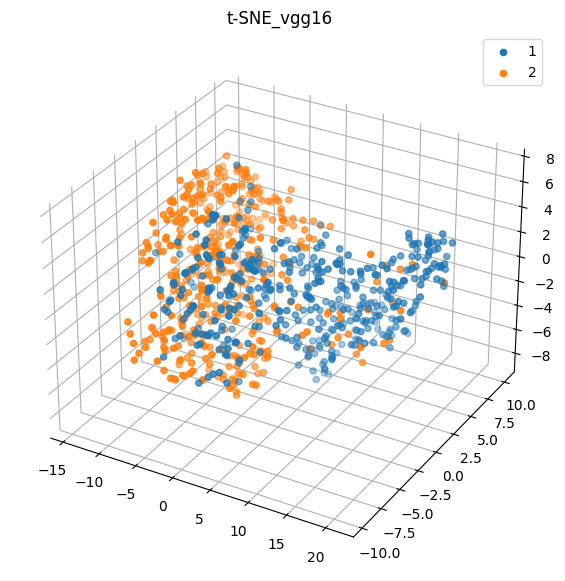

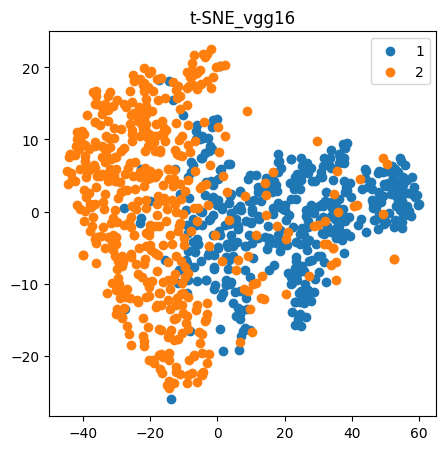

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# pretrained_means = [0.6190, 0.7493, 0.6781]
# pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Load pre-trained model for feature extraction
model = torch.hub.load('pytorch/vision', 'vgg16', pretrained=True)
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
tsne = TSNE(n_components=3)
embeddings = tsne.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('t-SNE_vgg16')
plt.legend()

# Save the plot as a PNG file
plt.savefig('t-SNE_vgg16_3.pdf')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
ts = TSNE(n_components=2)
embedd = ts.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('t-SNE_vgg16')
# Save the plot as a PNG file
plt.savefig('t-SNE_vgg16_2.pdf')
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise distances in the t-SNE embedding space
tsne_distances = pairwise_distances(embeddings)

# Calculate cosine similarity matrix for the t-SNE embeddings
cosine_sim = cosine_similarity(embeddings)

# Calculate silhouette score in the t-SNE embedding space
silhouette_tsne = silhouette_score(tsne_distances, labels, metric='precomputed')

# Calculate Davies-Bouldin index in the t-SNE embedding space
davies_bouldin_tsne = davies_bouldin_score(embeddings, labels)

# Apply K-Means clustering to t-SNE embeddings
kmeans = KMeans(n_clusters=len(dataset.classes), random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Calculate Adjusted Rand Index (ARI) for clustering
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels, cluster_labels)

# Calculate Inertia for K-Means clustering
inertia = kmeans.inertia_

# Calculate pairwise cosine similarities in the original feature space
cosine_sim_orig = cosine_similarity(features)

# Calculate the Frobenius norm of the difference between the original and t-SNE similarity matrices
frobenius_norm = np.linalg.norm(cosine_sim_orig - cosine_sim)

print("Silhouette Score (t-SNE):", silhouette_tsne)
print("Davies-Bouldin Index (t-SNE):", davies_bouldin_tsne)
print("Adjusted Rand Index (ARI) for Clustering:", ari)
print("Inertia for Clustering:", inertia)
print("Frobenius Norm of Similarity Matrices:", frobenius_norm)

Silhouette Score (t-SNE): 0.28185174
Davies-Bouldin Index (t-SNE): 1.263060149513597
Adjusted Rand Index (ARI) for Clustering: 0.3418621745507179
Inertia for Clustering: 42384.6796875
Frobenius Norm of Similarity Matrices: 1033.4491


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### efficientnet

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16429 sha256=8e9292cf294126494fcbd0cac0056accea86f71712b5899a7b62f4d4bf4ba905
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:01<00:00, 15.8MB/s]


Loaded pretrained weights for efficientnet-b0


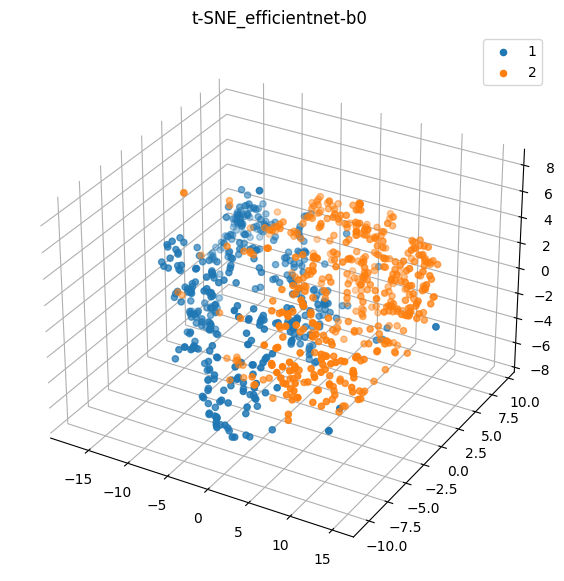

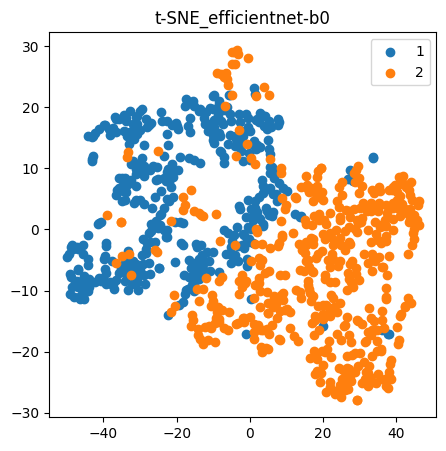

In [ ]:
! pip install efficientnet_pytorch
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from efficientnet_pytorch import EfficientNet

# pretrained_means = [0.6190, 0.7493, 0.6781]
# pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Load pre-trained model for feature extraction
model = EfficientNet.from_pretrained('efficientnet-b0')
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
tsne = TSNE(n_components=3)
embeddings = tsne.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('t-SNE_efficientnet-b0')
plt.legend()

# Save the plot as a PNG file
plt.savefig('t-SNE_efficientnet-b0_3.pdf')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
ts = TSNE(n_components=2)
embedd = ts.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('t-SNE_efficientnet-b0')
# Save the plot as a PNG file
plt.savefig('t-SNE_efficientnet-b0_2.pdf')
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise distances in the t-SNE embedding space
tsne_distances = pairwise_distances(embeddings)

# Calculate cosine similarity matrix for the t-SNE embeddings
cosine_sim = cosine_similarity(embeddings)

# Calculate silhouette score in the t-SNE embedding space
silhouette_tsne = silhouette_score(tsne_distances, labels, metric='precomputed')

# Calculate Davies-Bouldin index in the t-SNE embedding space
davies_bouldin_tsne = davies_bouldin_score(embeddings, labels)

# Apply K-Means clustering to t-SNE embeddings
kmeans = KMeans(n_clusters=len(dataset.classes), random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Calculate Adjusted Rand Index (ARI) for clustering
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels, cluster_labels)

# Calculate Inertia for K-Means clustering
inertia = kmeans.inertia_

# Calculate pairwise cosine similarities in the original feature space
cosine_sim_orig = cosine_similarity(features)

# Calculate the Frobenius norm of the difference between the original and t-SNE similarity matrices
frobenius_norm = np.linalg.norm(cosine_sim_orig - cosine_sim)

print("Silhouette Score (t-SNE):", silhouette_tsne)
print("Davies-Bouldin Index (t-SNE):", davies_bouldin_tsne)
print("Adjusted Rand Index (ARI) for Clustering:", ari)
print("Inertia for Clustering:", inertia)
print("Frobenius Norm of Similarity Matrices:", frobenius_norm)

Silhouette Score (t-SNE): 0.30305925
Davies-Bouldin Index (t-SNE): 1.2141262192097613
Adjusted Rand Index (ARI) for Clustering: 0.41748802470330926
Inertia for Clustering: 44005.21875
Frobenius Norm of Similarity Matrices: 979.64526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [00:16<00:00, 16.0MB/s]


Loaded pretrained weights for efficientnet-b7


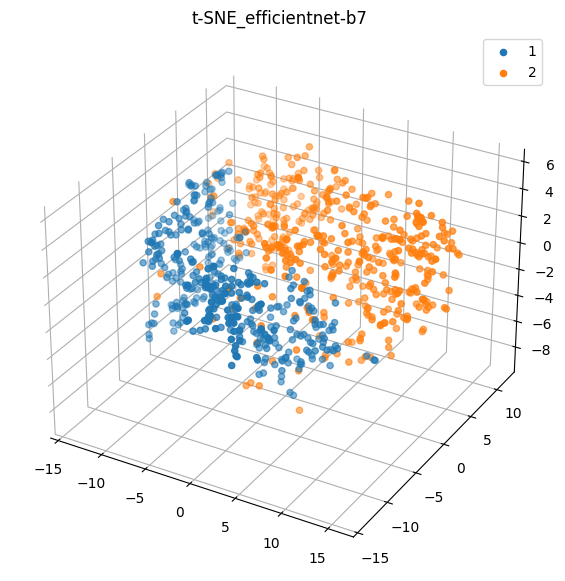

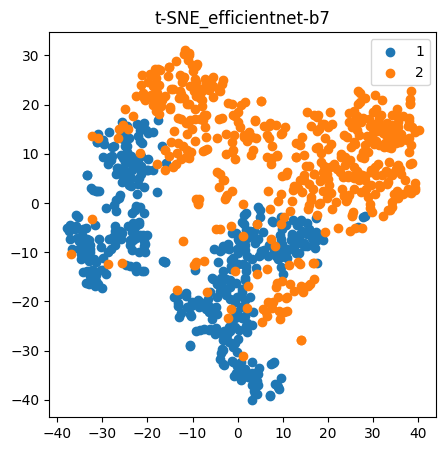

In [ ]:
! pip install efficientnet_pytorch
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from efficientnet_pytorch import EfficientNet

# pretrained_means = [0.6190, 0.7493, 0.6781]
# pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Load pre-trained model for feature extraction
model = EfficientNet.from_pretrained('efficientnet-b7')
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
tsne = TSNE(n_components=3)
embeddings = tsne.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('t-SNE_efficientnet-b7')
plt.legend()

# Save the plot as a PNG file
plt.savefig('t-SNE_efficientnet-b7_3.pdf')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
ts = TSNE(n_components=2)
embedd = ts.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('t-SNE_efficientnet-b7')
# Save the plot as a PNG file
plt.savefig('t-SNE_efficientnet-b7_2.pdf')
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise distances in the t-SNE embedding space
tsne_distances = pairwise_distances(embeddings)

# Calculate cosine similarity matrix for the t-SNE embeddings
cosine_sim = cosine_similarity(embeddings)

# Calculate silhouette score in the t-SNE embedding space
silhouette_tsne = silhouette_score(tsne_distances, labels, metric='precomputed')

# Calculate Davies-Bouldin index in the t-SNE embedding space
davies_bouldin_tsne = davies_bouldin_score(embeddings, labels)

# Apply K-Means clustering to t-SNE embeddings
kmeans = KMeans(n_clusters=len(dataset.classes), random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)

# Calculate Adjusted Rand Index (ARI) for clustering
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels, cluster_labels)

# Calculate Inertia for K-Means clustering
inertia = kmeans.inertia_

# Calculate pairwise cosine similarities in the original feature space
cosine_sim_orig = cosine_similarity(features)

# Calculate the Frobenius norm of the difference between the original and t-SNE similarity matrices
frobenius_norm = np.linalg.norm(cosine_sim_orig - cosine_sim)

print("Silhouette Score (t-SNE):", silhouette_tsne)
print("Davies-Bouldin Index (t-SNE):", davies_bouldin_tsne)
print("Adjusted Rand Index (ARI) for Clustering:", ari)
print("Inertia for Clustering:", inertia)
print("Frobenius Norm of Similarity Matrices:", frobenius_norm)

Silhouette Score (t-SNE): 0.2381003
Davies-Bouldin Index (t-SNE): 1.5844601015791655
Adjusted Rand Index (ARI) for Clustering: 0.03206082873299823
Inertia for Clustering: 46909.421875
Frobenius Norm of Similarity Matrices: 959.15924


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### inceptionV3

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:03<00:00, 31.0MB/s]


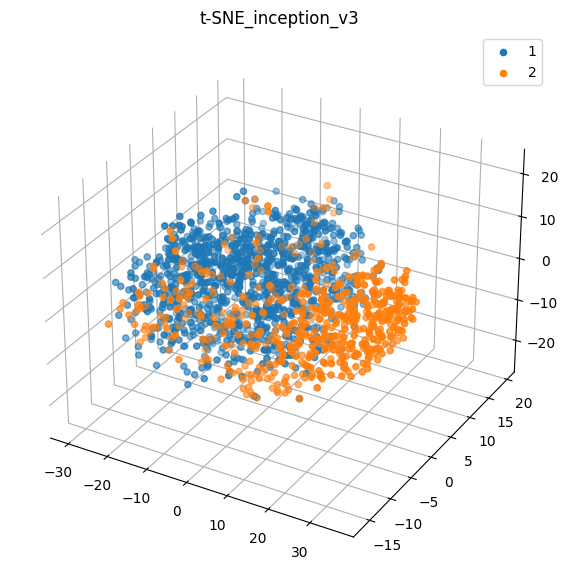

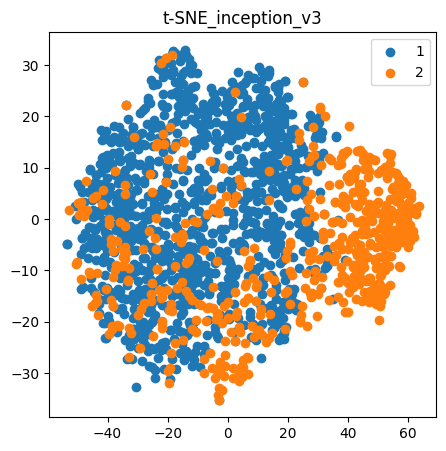

In [ ]:
! pip install efficientnet_pytorch
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from efficientnet_pytorch import EfficientNet
from torchvision.models import inception_v3
# pretrained_means = [0.6190, 0.7493, 0.6781]
# pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=8 , shuffle=True)

# Load pre-trained model for feature extraction
model = inception_v3(pretrained=True, aux_logits=True)
model.aux_logits = False
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
tsne = TSNE(n_components=3)
embeddings = tsne.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('t-SNE_inception_v3')
plt.legend()

# Save the plot as a PNG file
plt.savefig('t-SNE_inception_v3.JPG')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
ts = TSNE(n_components=2)
embedd = ts.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('t-SNE_inception_v3')
# Save the plot as a PNG file
plt.savefig('t-SNE_inception_v3_2.JPG')
plt.show()

# PCA

## resnet18

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


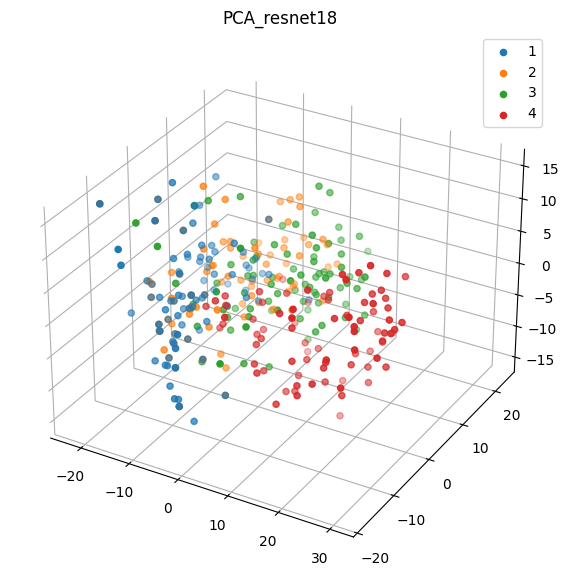

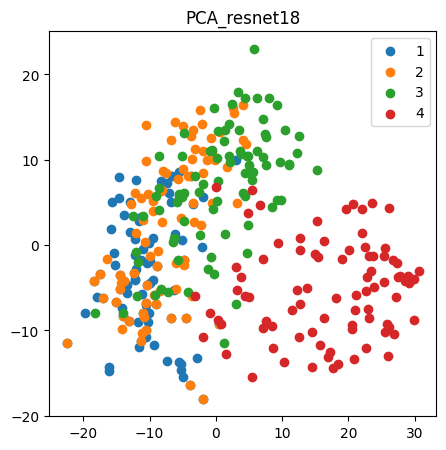

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pretrained_means = [0.6190, 0.7493, 0.6781]
pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Load pre-trained model for feature extraction
model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
pca = PCA(n_components=3)
embeddings = pca.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('PCA_resnet18')
plt.legend()

# Save the plot as a PNG file
plt.savefig('PCA_resnet18_3.JPG')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
pc = PCA(n_components=2)
embedd = pc.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('PCA_resnet18')
# Save the plot as a PNG file
plt.savefig('PCA_resnet18_2.JPG')
plt.show()

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


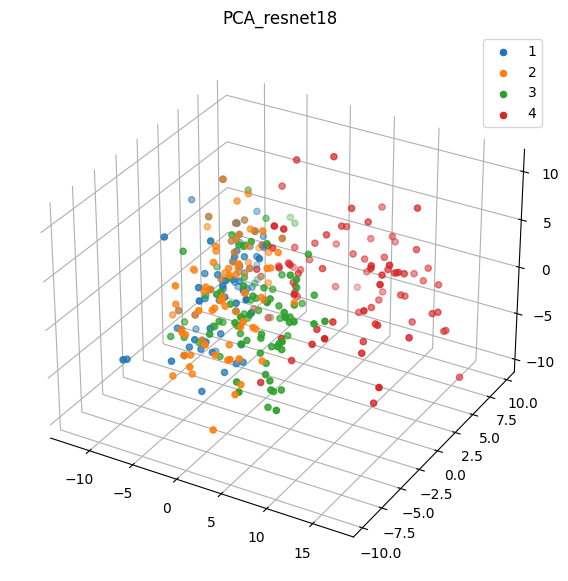

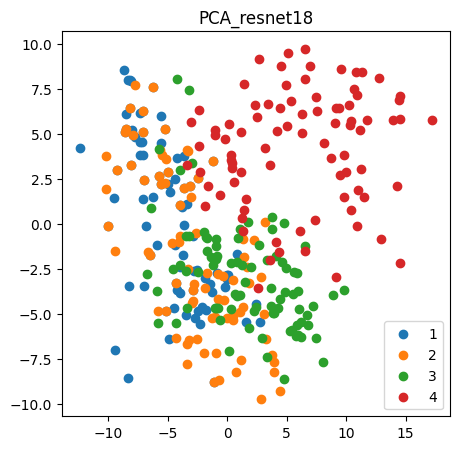

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pretrained_means = [0.6190, 0.7493, 0.6781]
pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Load pre-trained model for feature extraction
model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
pca = PCA(n_components=3)
embeddings = pca.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('PCA_resnet18')
plt.legend()

# Save the plot as a PNG file
plt.savefig('PCA_resnet18_3.JPG')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
pc = PCA(n_components=2)
embedd = pc.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('PCA_resnet18')
# Save the plot as a PNG file
plt.savefig('PCA_resnet18_2.JPG')
plt.show()

### resnet50

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


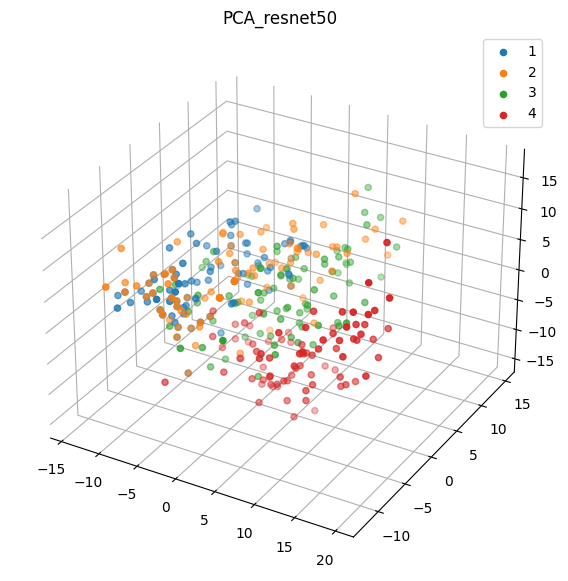

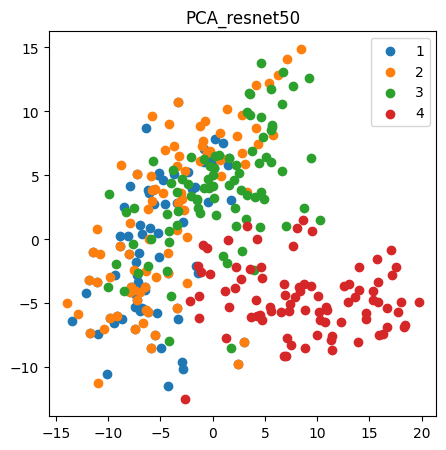

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pretrained_means = [0.6190, 0.7493, 0.6781]
pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Load pre-trained model for feature extraction
model = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
pca = PCA(n_components=3)
embeddings = pca.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('PCA_resnet50')
plt.legend()

# Save the plot as a PNG file
plt.savefig('PCA_resnet50_3.JPG')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
pc = PCA(n_components=2)
embedd = pc.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('PCA_resnet50')
# Save the plot as a PNG file
plt.savefig('PCA_resnet50_2.JPG')
plt.show()

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


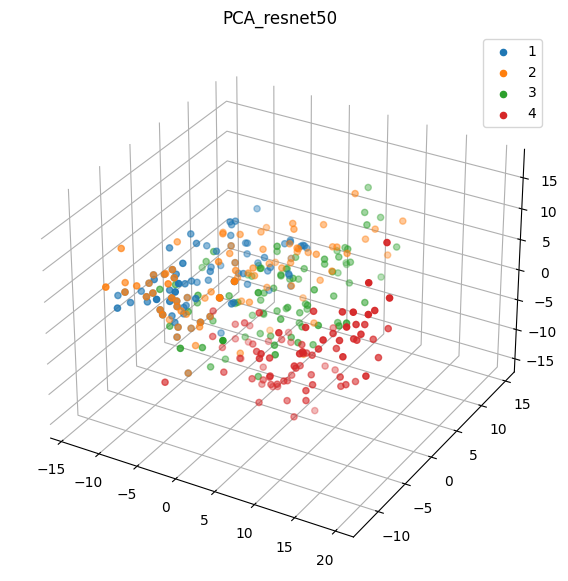

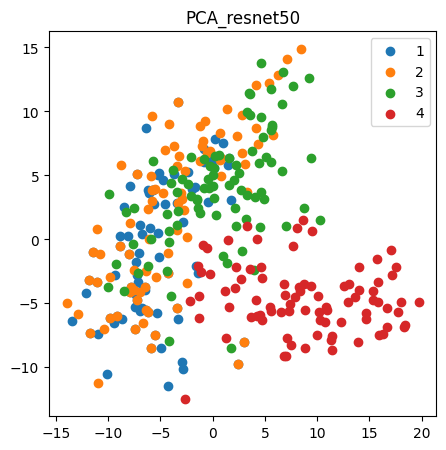

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pretrained_means = [0.6190, 0.7493, 0.6781]
pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((
        256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Load pre-trained model for feature extraction
model = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply t-SNE to reduce dimensionality of features
pca = PCA(n_components=3)
embeddings = pca.fit_transform(features)

# Visualize the t-SNE embeddings
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])

# Remove unnecessary elements from the plot
ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.zaxis.set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Set the title and legend
plt.title('PCA_resnet50')
plt.legend()

# Save the plot as a PNG file
plt.savefig('PCA_resnet50_3.JPG')

# Show the plot
plt.show()

# Apply PCA to reduce dimensionality of features
pc = PCA(n_components=2)
embedd = pc.fit_transform(features)
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i in range(len(dataset.classes)):
    plt.scatter(embedd[labels == i, 0], embedd[labels == i, 1], label=dataset.classes[i])
plt.legend()
plt.title('PCA_resnet50')
# Save the plot as a PNG file
plt.savefig('PCA_resnet50_2.JPG')
plt.show()

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


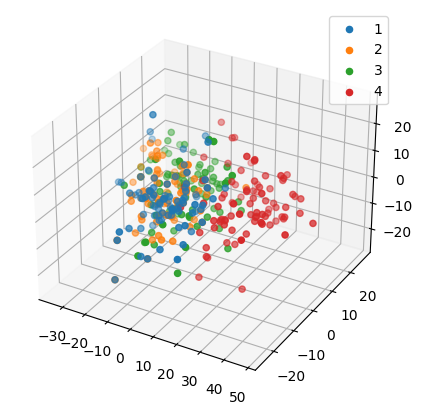

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pretrained_means = [0.6190, 0.7493, 0.6781]
pretrained_stds= [0.3942, 0.2770, 0.3786]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=pretrained_means, std=pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Load pre-trained model for feature extraction
model = torch.hub.load('pytorch/vision', 'vgg16', pretrained=True)
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply PCA to reduce dimensionality of features
pca = PCA(n_components=3)
embeddings = pca.fit_transform(features)

# Visualize the embeddings in 3D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])
ax.legend()
plt.show()

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=85f3e7e45d65852e7c9ecabc7803d3d6b017ab5704dd1406e048915ad95bc64b
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:01<00:00, 18.6MB/s]


Loaded pretrained weights for efficientnet-b0


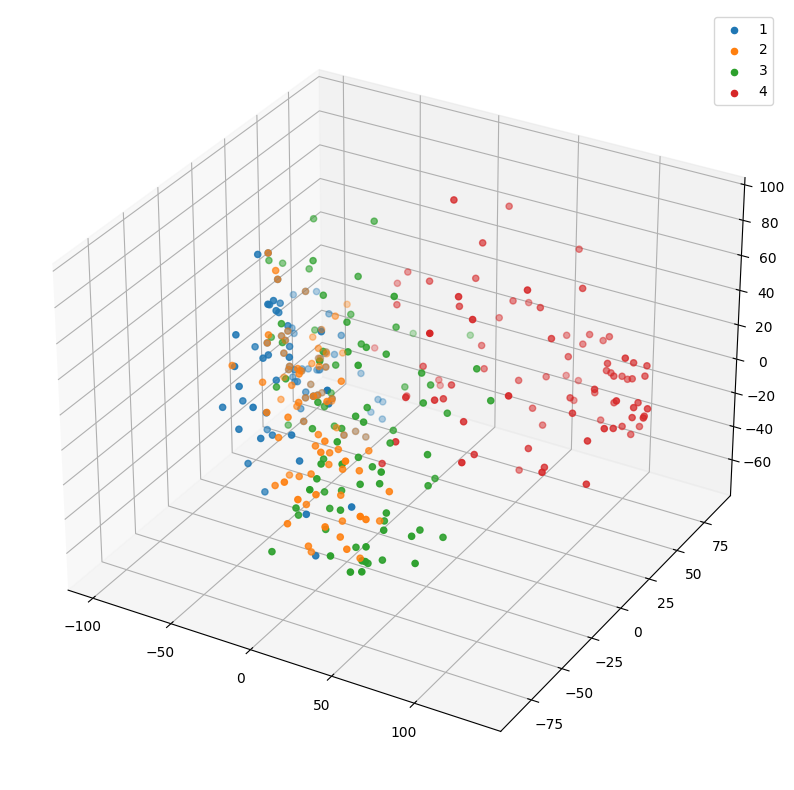

In [ ]:
! pip install efficientnet_pytorch
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from efficientnet_pytorch import EfficientNet

pretrained_means = [0.485, 0.456, 0.406]
pretrained_stds = [0.229, 0.224, 0.225]

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=pretrained_means, std=pretrained_stds)
])

# Load custom image dataset
dataset = ImageFolder(root=train_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Load pre-trained model for feature extraction
model = EfficientNet.from_pretrained('efficientnet-b0')
model.eval()
if torch.cuda.is_available():
    model.cuda()

# Extract features from images using the pre-trained model
def get_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for images, classes in dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
            features.append(model.extract_features(images).cpu().detach().numpy().reshape(images.shape[0], -1))
            labels.append(classes.numpy())
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

features, labels = get_features(dataloader)

# Apply PCA to reduce dimensionality of features
pca = PCA(n_components=3)
embeddings = pca.fit_transform(features)

# Visualize the embeddings in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(dataset.classes)):
    ax.scatter(embeddings[labels == i, 0], embeddings[labels == i, 1], embeddings[labels == i, 2], label=dataset.classes[i])
ax.legend()
plt.show()

## :))

In [ ]:
#data Agmentation
pretrained_size = 512
# pretrained_means = [0.6761, 0.8322, 0.3634]
# pretrained_stds= [0.2957, 0.1905, 0.3951]


pretrained_means = [0.6190, 0.7493, 0.6781]
pretrained_stds= [0.3942, 0.2770, 0.3786]

#transforms.RandomCrop(pretrained_size, padding = 10),
train_transforms = transforms.Compose([
                           transforms.Resize(pretrained_size),

                           transforms.ToTensor(),
                           transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
                       ])

test_transforms = transforms.Compose([
                           transforms.Resize(pretrained_size),
                           transforms.ToTensor(),
                           transforms.Normalize(mean = pretrained_means,
                                                std = pretrained_stds)
                       ])


In [ ]:
#load our data with our transforms

train_data = datasets.ImageFolder(root = train_dir,
                                  transform = train_transforms)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = test_transforms)

In [ ]:
#validation split

VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,
                                           [n_train_examples, n_valid_examples])

In [ ]:
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 306
Number of validation examples: 34
Number of testing examples: 24


In [ ]:
BATCH_SIZE = 16

train_iterator = data.DataLoader(train_data,
                                 shuffle = True,
                                 batch_size = BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size = BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size = len(test_data))

In [ ]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image

In [ ]:
def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (15, 15))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        label = classes[labels[i]]
        ax.set_title(label)
        ax.axis('off')

In [ ]:
# number of classes (labels)
classes = test_data.classes
classes

['1', '2', '3', '4']